In [1]:
import time
import random

t0 = time.time()
def simulate_walk(trials=1000000):
    success_count = 0
    
    for i in range(trials):
        position = 1  
        while position < 25:
            
            step = random.choice([1, 2]) 
            position += step
            if position == 25:
                success_count += 1 
    
    return success_count / trials  


estimated_probability = simulate_walk()
print(f"Estimated probability of reaching step 25: {estimated_probability:.5f}")

t1 = time.time()
print('Time taken:',t1-t0)

Estimated probability of reaching step 25: 0.66693
Time taken: 2.4545979499816895


In [2]:
import numpy as np
import time

t0 = time.time()

def simulate_walk_batched(trials=1000000, batch_size=10000):
    success_count = 0
    batches = trials // batch_size

    for _ in range(batches):
        steps = np.random.randint(1, 3, size=(batch_size, 24), dtype=np.int8)
        positions = np.cumsum(steps, axis=1, dtype=np.int16) + 1
        success_count += np.sum(np.any(positions == 25, axis=1))

    return success_count / trials

estimated_probability = simulate_walk_batched()
print(f"Estimated probability of landing on step 25: {estimated_probability:.10f}")

t1 = time.time()
print('Time taken(s):', t1 - t0)

Estimated probability of landing on step 25: 0.6665960000
Time taken(s): 0.10408902168273926


Time taken: 8.005958795547485


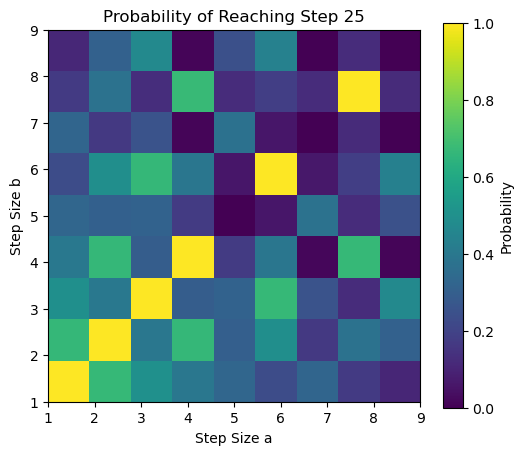

In [3]:
import random
import time
import matplotlib.pyplot as plt
import numpy as np

def simulate_walk(a, b, trials=100000):
    success_count = 0
    
    
    for _ in range(trials):
        position = 1  
        while position < goal:
            step = random.choice([a, b])
            position += step
            if position == goal:
                success_count += 1 
    
    return success_count / trials

t0 = time.time()

size = 9
prob_matrix = np.zeros((size, size))
goal = 25


results = []

for a in range(1, size + 1):
    for b in range(1, size + 1):
        prob = simulate_walk(a, b)
        prob_matrix[a-1, b-1] = prob
        results.append(((a, b), prob))


t1 = time.time()
print('Time taken:', t1 - t0)


plt.figure(figsize=(6, 5))
plt.imshow(prob_matrix, cmap='viridis', origin='lower', extent=[1, size, 1, size])
plt.colorbar(label="Probability")
plt.xlabel("Step Size a")
plt.ylabel("Step Size b")
plt.title(f"Probability of Reaching Step {goal}")
plt.xticks(range(1, size + 1))
plt.yticks(range(1, size + 1))
plt.show()

Time taken: 6.0596559047698975


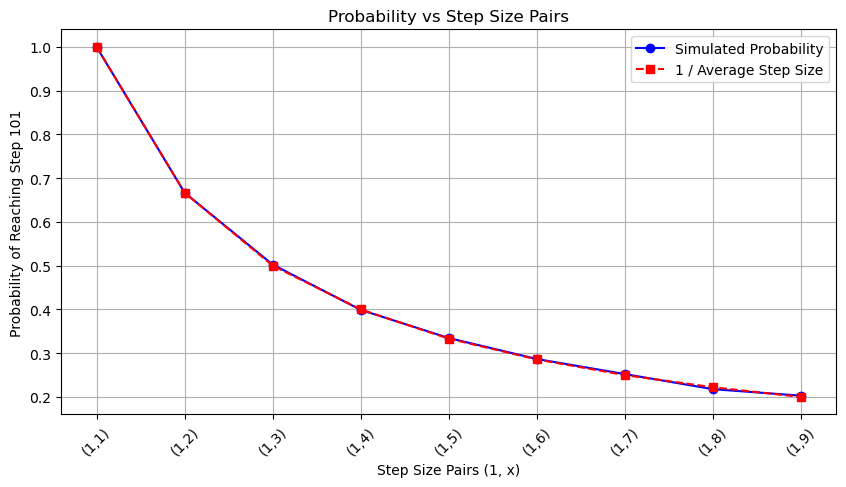

In [4]:
import random
import time
import matplotlib.pyplot as plt
import numpy as np

def simulate_walk(a, b):
    success_count = 0
    
    for _ in range(trials):
        position = 1  
        while position < goal:
            step = random.choice([a, b])  
            position += step
            if position == goal:
                success_count += 1 
    
    return success_count / trials 

t0 = time.time()

goal = 101
size = 9
trials = 100000
results = []

for x in range(1, size + 1):
    prob = simulate_walk(1, x)
    results.append(((1, x), prob))

t1 = time.time()
print('Time taken:', t1 - t0)


pairs = [f"(1,{x})" for (a, x), _ in results]
probs = [prob for _, prob in results]
avg_values = [(1 + x) / 2 for x in range(1, size + 1)]
reciprocal_avg = [1 / avg for avg in avg_values]


plt.figure(figsize=(10, 5))
plt.plot(pairs, probs, marker='o', linestyle='-', color='b', label="Simulated Probability")
plt.plot(pairs, reciprocal_avg, marker='s', linestyle='--', color='r', label="1 / Average Step Size")
plt.xlabel("Step Size Pairs (1, x)")
plt.ylabel(f"Probability of Reaching Step {goal}")
plt.title("Probability vs Step Size Pairs")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

Time taken: 5.287448883056641


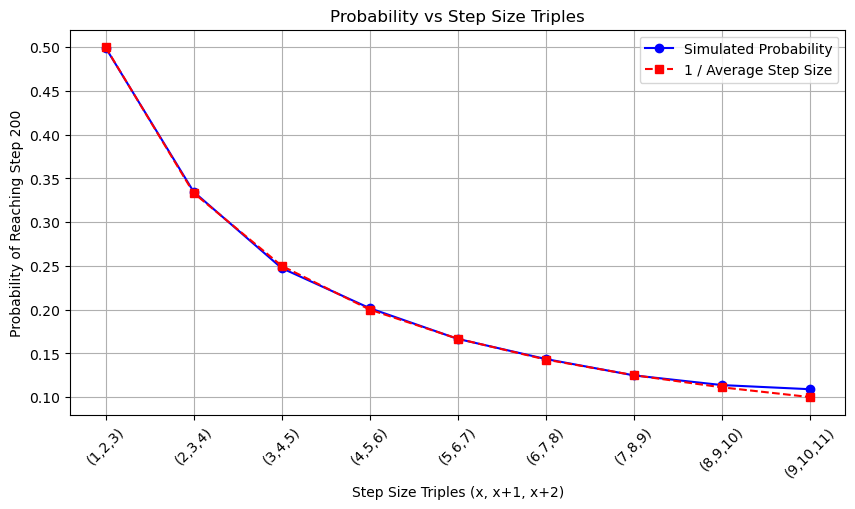

In [5]:
import random
import time
import matplotlib.pyplot as plt
import numpy as np

def simulate_walk(a, b, c):
    success_count = 0
    
    for _ in range(trials):
        position = 1  
        while position < goal:
            step = random.choice([a, b, c]) 
            position += step
            if position == goal:
                success_count += 1 
    
    return success_count / trials  

t0 = time.time()

goal = 200
size = 9  
trials = 100000
results = []

for x in range(1, size + 1):
    prob = simulate_walk(x, x+1, x+2)
    results.append(((x, x+1, x+2), prob))

t1 = time.time()
print('Time taken:', t1 - t0)


triples = [f"({x},{x+1},{x+2})" for (x, x1, x2), _ in results]
probs = [prob for _, prob in results]
avg_values = [(x + (x+1) + (x+2)) / 3 for x in range(1, size + 1)]
reciprocal_avg = [1 / avg for avg in avg_values]


plt.figure(figsize=(10, 5))
plt.plot(triples, probs, marker='o', linestyle='-', color='b', label="Simulated Probability")
plt.plot(triples, reciprocal_avg, marker='s', linestyle='--', color='r', label="1 / Average Step Size")
plt.xlabel("Step Size Triples (x, x+1, x+2)")
plt.ylabel(f"Probability of Reaching Step {goal}")
plt.title("Probability vs Step Size Triples")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()